In [ ]:
import torch
from torch import nn

## Самостоятельная реализация свертки

In [ ]:
def corr2d(X, K):  
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

In [3]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = torch.Tensor([[0, 1], [2, 3]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

## Детекция граней

In [4]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [5]:
## вертикальные грани есть
K = torch.Tensor([[1, -1]])
Y = corr2d(X, K)
print(X)
print(Y)

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])
tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])


In [6]:
## вертикальных граней нет
Z = corr2d(X.T, K)
print(X.T)
print(Z)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


## Сверточный слой

In [ ]:
X = X.reshape(1, 1, 6, 8)
Y = Y.reshape(1, 1, 6, 7)

In [ ]:
conv2d = torch.nn.Conv2d(1, 1, (1,2))

In [ ]:
trainer = torch.optim.SGD(conv2d.parameters(), lr=0.001)

In [10]:
for i in range(500):
    trainer.zero_grad()
    Y_hat = conv2d(X)
    l = ((Y_hat - Y) ** 2).sum()
    l.backward()
    trainer.step()
    if (i + 1) % 2 == 0:
        print('batch %d, loss %.3f' % (i + 1, l.item()))

batch 2, loss 15.497
batch 4, loss 13.063
batch 6, loss 11.417
batch 8, loss 10.246
batch 10, loss 9.367
batch 12, loss 8.670
batch 14, loss 8.091
batch 16, loss 7.590
batch 18, loss 7.144
batch 20, loss 6.739
batch 22, loss 6.366
batch 24, loss 6.020
batch 26, loss 5.696
batch 28, loss 5.392
batch 30, loss 5.106
batch 32, loss 4.837
batch 34, loss 4.582
batch 36, loss 4.342
batch 38, loss 4.115
batch 40, loss 3.901
batch 42, loss 3.698
batch 44, loss 3.507
batch 46, loss 3.325
batch 48, loss 3.154
batch 50, loss 2.991
batch 52, loss 2.838
batch 54, loss 2.692
batch 56, loss 2.555
batch 58, loss 2.424
batch 60, loss 2.301
batch 62, loss 2.184
batch 64, loss 2.073
batch 66, loss 1.968
batch 68, loss 1.869
batch 70, loss 1.775
batch 72, loss 1.685
batch 74, loss 1.601
batch 76, loss 1.520
batch 78, loss 1.444
batch 80, loss 1.372
batch 82, loss 1.303
batch 84, loss 1.238
batch 86, loss 1.177
batch 88, loss 1.118
batch 90, loss 1.063
batch 92, loss 1.010
batch 94, loss 0.960
batch 96, los

In [11]:
print(conv2d.weight)
print(conv2d.bias)

Parameter containing:
tensor([[[[ 0.9980, -0.9980]]]], requires_grad=True)
Parameter containing:
tensor([1.6462e-05], requires_grad=True)


## Padding и stride

In [12]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 8, 8])

In [13]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 4, 4])

## Каналы

In [14]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 8, 8])

In [15]:
conv2d.weight.shape

torch.Size([1, 1, 3, 3])

In [16]:
conv2d = nn.Conv2d(3, 32, kernel_size=3, padding=1)
X = torch.randn((1, 3, 8, 8))
conv2d(X).shape

torch.Size([1, 32, 8, 8])

In [17]:
conv2d.weight.shape

torch.Size([32, 3, 3, 3])

## Pooling

In [ ]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [19]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(X)
print(pool2d(X, (2, 2)))

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
tensor([[4., 5.],
        [7., 8.]])


In [20]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [21]:
X = torch.arange(16).reshape((1, 1, 4, 4)).type(torch.float)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [22]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [23]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [24]:
pool2d = nn.MaxPool2d((2, 3), padding=(1, 1), stride=(2, 3))
pool2d(X)

tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])

In [25]:
X = torch.cat((X, X + 1), dim=1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [26]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

## Lenet

In [ ]:
import torchvision as tv
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
BATCH_SIZE=256

In [29]:
train_dataset = tv.datasets.MNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

0it [00:00, ?it/s]

9920512it [00:01, 9115276.74it/s]                            


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 137045.36it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


1654784it [00:00, 2332312.96it/s]                            
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


8192it [00:00, 54396.54it/s]            


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


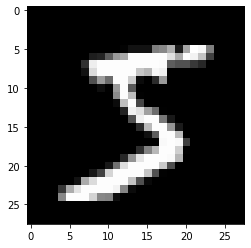

In [30]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

In [31]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Conv2d(6, 12, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Flatten(),
    nn.Linear(300, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

In [33]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 1, 28, 28])
Layer Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)). X shape: torch.Size([1, 6, 28, 28])
Layer ReLU(). X shape: torch.Size([1, 6, 28, 28])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 6, 14, 14])
Layer Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 12, 10, 10])
Layer ReLU(). X shape: torch.Size([1, 12, 10, 10])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 12, 5, 5])
Layer Flatten(). X shape: torch.Size([1, 300])
Layer Linear(in_features=300, out_features=50, bias=True). X shape: torch.Size([1, 50])
Layer ReLU(). X shape: torch.Size([1, 50])
Layer Linear(in_features=50, out_features=10, bias=True). X shape: torch.Size([1, 10])


In [34]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
y = model(X)
print(y.shape)

torch.Size([1, 10])


In [ ]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [ ]:
def train(net, train_iter, test_iter, trainer, num_epochs):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [37]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs)

epoch 1, loss 0.7463, train acc 0.757, test acc 0.959, time 16.2 sec
epoch 2, loss 0.1185, train acc 0.963, test acc 0.971, time 15.9 sec
epoch 3, loss 0.0879, train acc 0.973, test acc 0.974, time 16.0 sec
epoch 4, loss 0.0721, train acc 0.978, test acc 0.976, time 15.8 sec
epoch 5, loss 0.0623, train acc 0.981, test acc 0.979, time 15.9 sec


## Обучение на GPU

In [ ]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [39]:
dev

device(type='cuda')

In [ ]:
model = model.to(dev)

In [ ]:
def train(net, train_iter, test_iter, trainer, num_epochs, dev):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            X, y = X.to(dev), y.to(dev)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net, dev)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [ ]:
def evaluate_accuracy(data_iter, net, dev):
    acc_sum, n = torch.Tensor([0]).to(dev), 0
    for X, y in data_iter:
        X, y = X.to(dev), y.to(dev)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [43]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)

epoch 1, loss 0.0553, train acc 0.983, test acc 0.981, time 8.6 sec
epoch 2, loss 0.0499, train acc 0.985, test acc 0.982, time 8.5 sec
epoch 3, loss 0.0457, train acc 0.986, test acc 0.982, time 8.5 sec
epoch 4, loss 0.0419, train acc 0.987, test acc 0.983, time 8.5 sec
epoch 5, loss 0.0391, train acc 0.988, test acc 0.984, time 8.5 sec


## Аугментация данных

In [ ]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j], cmap='gray')
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
def apply(img, aug, num_rows=2, num_cols=4, scale=2):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

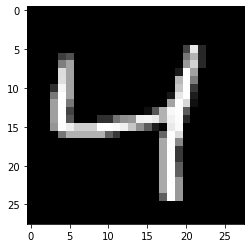

In [46]:
dataset = tv.datasets.MNIST('.', train=True, download=True)
img = dataset[2][0]
plt.imshow(img, cmap='gray')

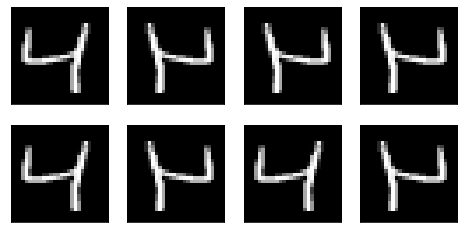

In [47]:
apply(img, tv.transforms.RandomHorizontalFlip())

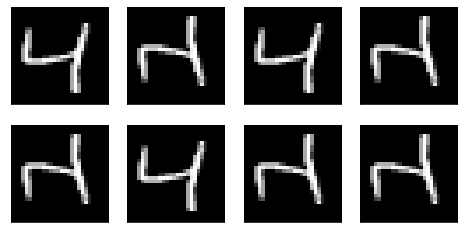

In [48]:
apply(img, tv.transforms.RandomVerticalFlip())

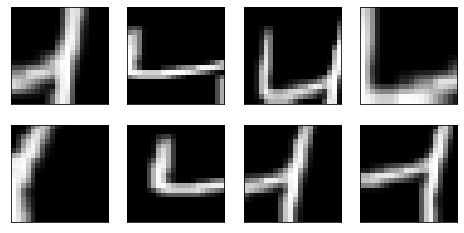

In [49]:
## A crop of random size (default: of 0.08 to 1.0) of the original size and a random aspect ratio
## (default: of 3/4 to 4/3) of the original aspect ratio is made.
## This crop is finally resized to given size. 
apply(img, tv.transforms.RandomResizedCrop((20,20), scale=(0.1, 1.), ratio=(0.5, 2)))

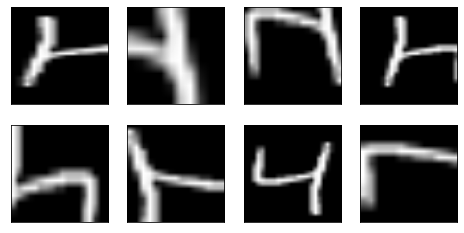

In [50]:
augs = tv.transforms.Compose([
    tv.transforms.RandomHorizontalFlip(),
    tv.transforms.RandomVerticalFlip(),
    tv.transforms.RandomResizedCrop(
        (200, 200), scale=(0.1, 1), ratio=(0.5, 2))])
apply(img, augs)

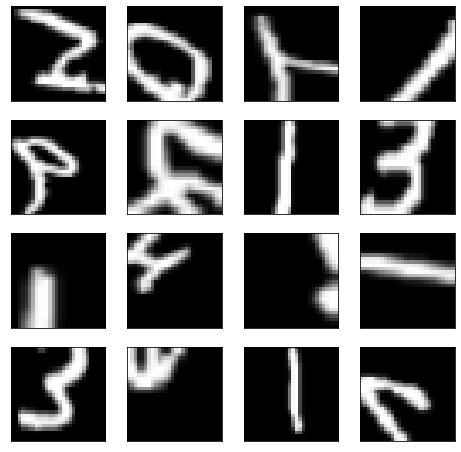

In [51]:
augs = tv.transforms.Compose([
    tv.transforms.RandomHorizontalFlip(),
    tv.transforms.RandomVerticalFlip(),
    tv.transforms.RandomResizedCrop(
        (28, 28), scale=(0.1, 1), ratio=(0.5, 2)),
    tv.transforms.ToTensor()])
dataset = tv.datasets.MNIST('.', train=True, transform=augs, download=True)
loader = torch.utils.data.DataLoader(dataset, batch_size=16)

for X, _ in loader:
    X = X.reshape(16, 28, 28)
    show_images(X, 4, 4)
    break

## Hometask
http://www.nlpr.ia.ac.cn/pal/trafficdata/tsrd-train.zip
http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Test.zip
http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Train%20Annotation.zip
http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Test%20Annotation.zip

In [53]:
import urllib
urllib.request.urlretrieve ("http://www.nlpr.ia.ac.cn/pal/trafficdata/tsrd-train.zip", "tsrd-train.zip")
urllib.request.urlretrieve ("http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Test.zip", "TSRD-Test.zip")
urllib.request.urlretrieve ("http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Train%20Annotation.zip", "TSRD-Train%20Annotation.zip")
urllib.request.urlretrieve ("http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Test%20Annotation.zip", "TSRD-Test%20Annotation.zip")

('TSRD-Test%20Annotation.zip', <http.client.HTTPMessage at 0x7fd83ef940f0>)

In [ ]:
#tv.datasets.imageFolder
#tv.transforms.Resize

In [ ]:
import torch
from torch import nn
import torchvision as tv
import time
import numpy as np

In [56]:
!mkdir images
!unzip tsrd-train.zip -d images/train
!unzip TSRD-Test.zip -d images/test
!unzip TSRD-Train%20Annotation.zip -d images/train/Annotation
!unzip TSRD-Test%20Annotation.zip -d images/test/Annotation

Archive:  tsrd-train.zip
  inflating: images/train/056_0051.png  
  inflating: images/train/056_0052.png  
 extracting: images/train/056_0053.png  
 extracting: images/train/056_0054.png  
  inflating: images/train/057_0001.png  
  inflating: images/train/057_1_0001.png  
  inflating: images/train/057_1_0002.png  
  inflating: images/train/057_1_0003_1_j.png  
  inflating: images/train/057_0002.png  
  inflating: images/train/057_0003_j.png  
 extracting: images/train/000_0001.png  
 extracting: images/train/000_1_0001.png  
  inflating: images/train/000_1_0002.png  
 extracting: images/train/000_1_0003.png  
 extracting: images/train/000_1_0004.png  
 extracting: images/train/000_1_0005.png  
 extracting: images/train/000_1_0006.png  
 extracting: images/train/000_1_0007.png  
 extracting: images/train/000_1_0008.png  
 extracting: images/train/000_1_0008_1_j.png  
 extracting: images/train/000_1_0009.png  
 extracting: images/train/000_1_0010.png  
  inflating: images/train/000_1_001

In [ ]:
#!cat images/train/Annotation/TsignRecgTrain4170Annotation.txt  
#images/test/Annotation/TsignRecgTest1994Annotation.txt
#000_0001.png;134;128;19;7;120;117;0;
import pandas as pd
import shutil
import os

df_train = pd.read_csv('images/train/Annotation/TsignRecgTrain4170Annotation.txt',sep=';',header=None,names=['name','c1','c2','c3','c4','c5','c6','class','na']).drop(['na'],axis=1)
for r in df_train[['name','class']].values:
  directory = os.path.dirname("images/train/"+str(r[1])+'/')
  if not os.path.exists(directory):
      os.makedirs(directory)
  shutil.move("images/train/"+r[0], directory+'/'+r[0])
  #print("images/train/"+r[0], directory+r[0])

In [ ]:
df_test = pd.read_csv('images/test/Annotation/TsignRecgTest1994Annotation.txt',sep=';',header=None,names=['name','c1','c2','c3','c4','c5','c6','class','na']).drop(['na'],axis=1)
for r in df_test[['name','class']].values:
  directory = os.path.dirname("images/test/"+str(r[1])+'/')
  if not os.path.exists(directory):
      os.makedirs(directory)
  shutil.move("images/test/"+r[0], directory+'/'+r[0])

In [ ]:
transforms = tv.transforms.Compose([
    #tv.transforms.Grayscale(3),
    #tv.transforms.RandomHorizontalFlip(),
    #tv.transforms.RandomVerticalFlip(),
    #tv.transforms.RandomResizedCrop(
    #    (224, 224), scale=(0.1, 1), ratio=(0.5, 2)),
    tv.transforms.Resize((224,224)),
    tv.transforms.ToTensor()    
])

In [ ]:
BATCH_SIZE=16
train_dataset = tv.datasets.ImageFolder("images/train", transform=transforms)
test_dataset = tv.datasets.ImageFolder("images/test", transform=transforms)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [ ]:
labels = [td[1] for td in train_dataset]

In [ ]:
lbs = np.array(labels)

In [63]:
np.unique(lbs)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
for X, y in train_iter:
  break

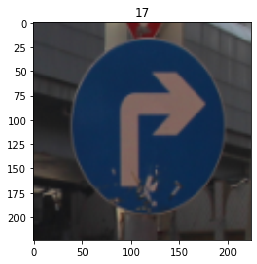

In [66]:
img_code = 10
plt.imshow(X[img_code].permute(1,2,0))
plt.title(str(y[img_code].item()))
plt.show()

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=2),
    nn.Conv2d(64, 256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=2),
    nn.Conv2d(256, 512, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=2),
    nn.Conv2d(512, 1024, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=2),
    nn.Flatten(),
    nn.Linear(173056, 1024),
    nn.ReLU(),
    nn.Linear(1024, len(np.unique(lbs)))
)

In [68]:
X = train_dataset[0][0]
X = X.reshape(1, 3, 224, 224)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 3, 224, 224])
Layer Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)). X shape: torch.Size([1, 64, 224, 224])
Layer ReLU(). X shape: torch.Size([1, 64, 224, 224])
Layer MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 64, 111, 111])
Layer Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)). X shape: torch.Size([1, 256, 111, 111])
Layer ReLU(). X shape: torch.Size([1, 256, 111, 111])
Layer MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 256, 55, 55])
Layer Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)). X shape: torch.Size([1, 512, 55, 55])
Layer ReLU(). X shape: torch.Size([1, 512, 55, 55])
Layer MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 512, 27, 27])
Layer Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)). X shape: torch.Size([1, 1024, 27, 27]

In [ ]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [70]:
dev

device(type='cuda')

In [ ]:
model = model.to(dev)

In [ ]:
def train(net, train_iter, test_iter, trainer, num_epochs, dev):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            X, y = X.to(dev), y.to(dev)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net, dev)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [ ]:
def evaluate_accuracy(data_iter, net, dev):
    acc_sum, n = torch.Tensor([0]).to(dev), 0
    for X, y in data_iter:
        X, y = X.to(dev), y.to(dev)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [74]:
lr, num_epochs = 0.01, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)

epoch 1, loss 3.6671, train acc 0.090, test acc 0.042, time 41.8 sec
epoch 2, loss 3.5771, train acc 0.098, test acc 0.020, time 41.8 sec
epoch 3, loss 3.5597, train acc 0.107, test acc 0.029, time 41.7 sec
epoch 4, loss 3.3964, train acc 0.138, test acc 0.031, time 41.7 sec
epoch 5, loss 2.2751, train acc 0.354, test acc 0.110, time 41.6 sec


In [75]:
lr, num_epochs = 0.01, 5
trainer = torch.optim.Adam(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)

epoch 1, loss 9.5426, train acc 0.370, test acc 0.111, time 47.9 sec
epoch 2, loss 6.6547, train acc 0.231, test acc 0.042, time 47.7 sec
epoch 3, loss 3.5596, train acc 0.107, test acc 0.042, time 47.8 sec
epoch 4, loss 3.5539, train acc 0.107, test acc 0.042, time 48.0 sec
epoch 5, loss 3.5528, train acc 0.104, test acc 0.042, time 47.9 sec


In [76]:
model = tv.models.resnet18(pretrained=True)
for name, param in model.named_parameters():
    if not (name.startswith('layer4')):
      param.requires_grad = False
model.fc = nn.Linear(512, len(np.unique(lbs)))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 18.2MB/s]


In [77]:
model = model.to(dev)
print("Params to learn:")
params_to_update = []
for name,param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 layer4.0.conv1.weight
	 layer4.0.bn1.weight
	 layer4.0.bn1.bias
	 layer4.0.conv2.weight
	 layer4.0.bn2.weight
	 layer4.0.bn2.bias
	 layer4.0.downsample.0.weight
	 layer4.0.downsample.1.weight
	 layer4.0.downsample.1.bias
	 layer4.1.conv1.weight
	 layer4.1.bn1.weight
	 layer4.1.bn1.bias
	 layer4.1.conv2.weight
	 layer4.1.bn2.weight
	 layer4.1.bn2.bias
	 fc.weight
	 fc.bias


In [78]:
lr, num_epochs = 0.01, 5
trainer = torch.optim.Adam(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)

epoch 1, loss 1.9722, train acc 0.535, test acc 0.036, time 20.9 sec
epoch 2, loss 0.4257, train acc 0.879, test acc 0.043, time 21.0 sec
epoch 3, loss 0.2029, train acc 0.941, test acc 0.035, time 20.9 sec
epoch 4, loss 0.1917, train acc 0.951, test acc 0.043, time 20.8 sec
epoch 5, loss 0.0747, train acc 0.978, test acc 0.042, time 21.0 sec
